### Import labraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

### Load the dataset

In [3]:
data_dir = 'Data'
data = tf.keras.preprocessing.image_dataset_from_directory(data_dir, batch_size=32, image_size=(256, 256), shuffle=True)

Found 2023 files belonging to 2 classes.


In [4]:
# class names 
class_names = data.class_names
class_names

['cats', 'dogs']

### Preporcessing 


In [5]:
data = data.map(lambda x, y: (x / 255, y))

In [6]:
scaled_data = data.as_numpy_iterator()
scaled_data.next()[0].max()

1.0

In [7]:
scaled_data.next()[0].min()

0.0

### train, val, test split 

In [8]:
len(data)

64

In [13]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.1) + 1
test_size = int(len(data)*.1)

In [14]:
train_size, val_size, test_size

(51, 7, 6)

In [15]:
train_size + val_size + test_size

64

In [16]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size).skip(val_size).take(test_size)

### Model

In [17]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # flatten 
    Flatten(), 

    # dense layers 
    Dense(64, activation='relu'), 
    Dropout(0.2),

    # output layer 
    Dense(1, activation='sigmoid')
    
])

In [18]:
# model compile 
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Train 

In [20]:
logdirs = 'logs'

In [21]:
tensorflow_callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdirs)

In [22]:
hist = model.fit(train_data, validation_data=val_data, epochs=20, callbacks=[tensorflow_callbacks])

Epoch 1/20
51/51 [==============================] - 92s 2s/step - loss: 0.6973 - accuracy: 0.4926 - val_loss: 0.6943 - val_accuracy: 0.4464
Epoch 2/20
51/51 [==============================] - 89s 2s/step - loss: 0.6922 - accuracy: 0.5355 - val_loss: 0.6871 - val_accuracy: 0.5446
Epoch 3/20
51/51 [==============================] - 96s 2s/step - loss: 0.6852 - accuracy: 0.5515 - val_loss: 0.6800 - val_accuracy: 0.5938
Epoch 4/20
51/51 [==============================] - 84s 2s/step - loss: 0.6741 - accuracy: 0.6011 - val_loss: 0.6764 - val_accuracy: 0.5670
Epoch 5/20
51/51 [==============================] - 89s 2s/step - loss: 0.6438 - accuracy: 0.6342 - val_loss: 0.6403 - val_accuracy: 0.6562
Epoch 6/20
51/51 [==============================] - 78s 2s/step - loss: 0.6007 - accuracy: 0.6808 - val_loss: 0.6044 - val_accuracy: 0.6429
Epoch 7/20
51/51 [==============================] - 74s 1s/step - loss: 0.5494 - accuracy: 0.7218 - val_loss: 0.5500 - val_accuracy: 0.7411
Epoch 8/20
51/51 [==

### Performance evaluation

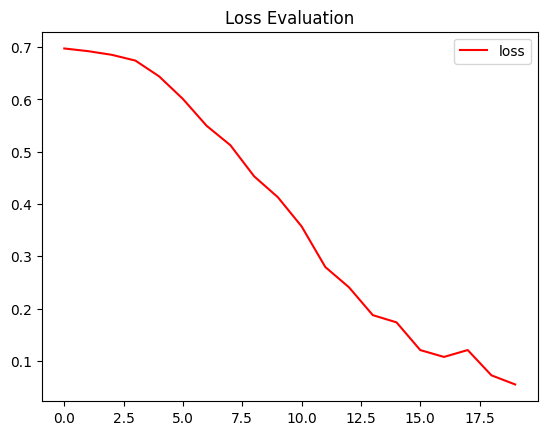

In [35]:
plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')

plt.title('Loss Evaluation')
plt.legend()
plt.show()

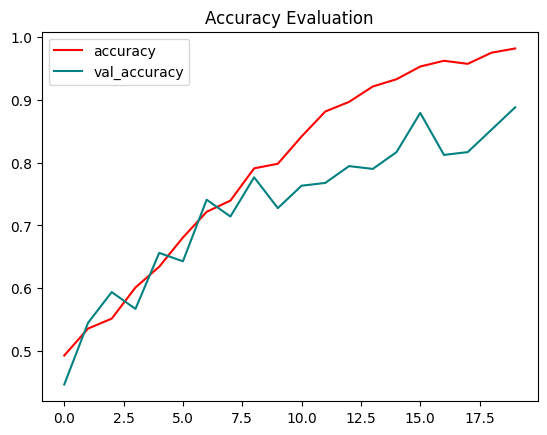

In [24]:
plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='teal', label='val_accuracy')
plt.title('Accuracy Evaluation')
plt.legend()
plt.show()

In [25]:
model.evaluate(test_data)

6/6 [==============================] - 3s 213ms/step - loss: 0.5771 - accuracy: 0.8623


[0.5770878195762634, 0.8622754216194153]

### model save 

In [26]:
model.save(os.path.join('models', 'Dog_Cat_classifier.h5'))

In [28]:
## load model 
from tensorflow.keras.models import load_model
model = load_model('./models/Dog_Cat_classifier.h5')

### Prediction

First image to predict
Actual label dogs
1/1 [==============================] - 0s 464ms/step
Predicted label cats


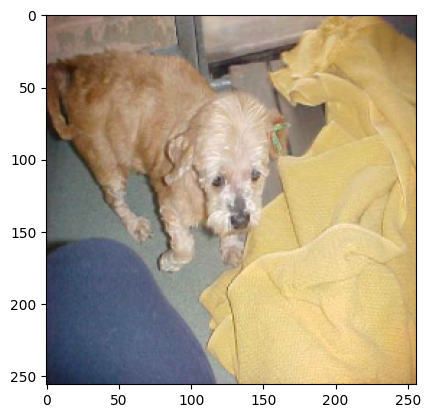

In [29]:
for image_batch, label_batch in test_data.take(1):
    first_image = image_batch[0].numpy()
    first_label = label_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label", class_names[label_batch[0]])

    # prediction 
    batch_prediction = model.predict(image_batch)
    print("Predicted label", class_names[np.argmax(batch_prediction[0])])

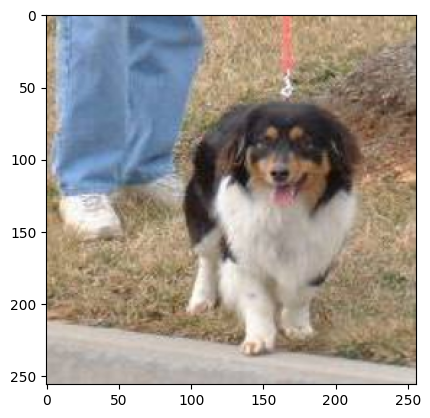

In [32]:
from PIL import Image
image = Image.open("dog.2.jpg")
image = image.resize((256, 256))
img_array = np.array(image) / 255
img_array = np.expand_dims(img_array, axis=0)
plt.imshow(image)

In [33]:
prediction = model.predict(img_array)

1/1 [==============================] - 0s 167ms/step


In [34]:
predicted_class = class_names[int(np.round(prediction))]
predicted_class

C:\Users\Felix\AppData\Local\Temp\ipykernel_7712\2252805184.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_names[int(np.round(prediction))]


'dogs'